# Data Preprocessing

In [1]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# import dataset
dataset = pd.read_csv('Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [14]:
# X: independent variable; y: dependent variable
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
# Taking care of missing data: axis = 0: column average, axis = 1: row average
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [16]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
X

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 63777.77777777778],
       [0, 35.0, 58000.0],
       [2, 38.77777777777778, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [17]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features =  [0])
X = onehotencoder.fit_transform(X).toarray()
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.40000000e+01,
        7.20000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 2.70000000e+01,
        4.80000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 3.00000000e+01,
        5.40000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.80000000e+01,
        6.10000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 4.00000000e+01,
        6.37777778e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.50000000e+01,
        5.80000000e+04],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.87777778e+01,
        5.20000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.80000000e+01,
        7.90000000e+04],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 5.00000000e+01,
        8.30000000e+04],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.70000000e+01,
        6.70000000e+04]])

In [18]:
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Fearure Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Simple Linear Regression

In [12]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Section 4 - Simple Linear Regression/Salary_data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [14]:
# Fitting Simple Linear Regression to the Training Set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

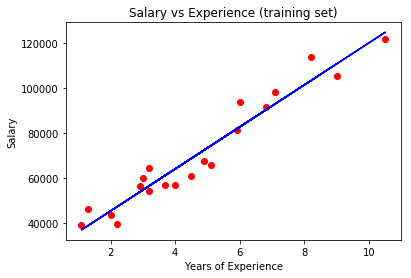

In [18]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

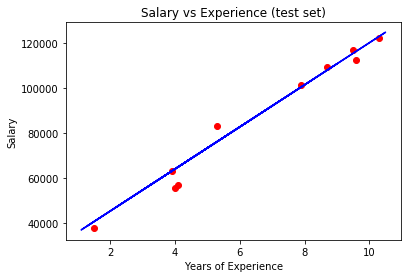

In [19]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Multiple Linear Regression

## Assumtions of a Linear Regression:
### 1. Linearity
### 2. Homoscedasticity
### 3. Multivariate normality
### 4. Independence of errors
### 5. Lack of Multicollinearity

## 5 methods of building models
### 1. All-in
### 2. Backward Elimination
### 3. Forward Selection
### 4. Bidirectional Elimination
### 5. Score Comparison

In [32]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 5/Section 5 - Multiple Linear Regression/50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [33]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [34]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

In [35]:
# Encoding categorical data
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features =  [3])
X = onehotencoder.fit_transform(X).toarray()

In [36]:
# Avoiding the Dummy Variable Trap
X = X[:, 1:]

In [37]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [38]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [40]:
# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X_train = np.append(arr = np.ones((40,1)), values = X_train, axis = 1)

In [41]:
X_opt = X_train[:, [0,1,2,3,4,5]]

In [42]:
regressor_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           3.91e-21
Time:                        23:59:00   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.255e+04   8358.538      5.091      0.000    2.56e+04    5.95e+04
x1          -959.2842   4038.108     -0.238      0.814   -9165.706    7247.138
x2           699.3691   3661.563      0.191      0.850   -6741.822    8140.560
x3             0.7735      0.055     14.025      0.000       0.661       0.886
x4             0.0329      0.066      0.495      0.624      -0.102       0.168
x5             0.0366      0.019      1.884      0.068      -0.003       0.076
==============================================================================
Omnibus:                       15.823   Durbin-Watson:                   2.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.231
Skew:                          -1.094   Prob(JB):                     9.03e-06
Kurtosis:                       6.025   Cond. No.                     1.49e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X_opt = X_train[:, [0,1,3,4,5]]
regresso_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regresso_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.7
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           2.87e-22
Time:                        23:59:42   Log-Likelihood:                -421.12
No. Observations:                  40   AIC:                             852.2
Df Residuals:                      35   BIC:                             860.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.292e+04   8020.397      5.352      0.000    2.66e+04    5.92e+04
x1         -1272.1608   3639.780     -0.350      0.729   -8661.308    6116.986
x2             0.7754      0.053     14.498      0.000       0.667       0.884
x3             0.0319      0.065      0.488      0.629      -0.101       0.165
x4             0.0363      0.019      1.902      0.065      -0.002       0.075
==============================================================================
Omnibus:                       16.074   Durbin-Watson:                   2.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.553
Skew:                          -1.086   Prob(JB):                     4.66e-06
Kurtosis:                       6.164   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
X_opt = X_train[:, [0,3,4,5]]
regresso_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regresso_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     227.8
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           1.85e-23
Time:                        00:00:00   Log-Likelihood:                -421.19
No. Observations:                  40   AIC:                             850.4
Df Residuals:                      36   BIC:                             857.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.299e+04   7919.773      5.428      0.000    2.69e+04    5.91e+04
x1             0.7788      0.052     15.003      0.000       0.674       0.884
x2             0.0294      0.064      0.458      0.650      -0.101       0.160
x3             0.0347      0.018      1.896      0.066      -0.002       0.072
==============================================================================
Omnibus:                       15.557   Durbin-Watson:                   2.481
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.539
Skew:                          -1.081   Prob(JB):                     1.28e-05
Kurtosis:                       5.974   Cond. No.                     1.43e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
X_opt = X_train[:, [0,3,5]]
regresso_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regresso_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     349.0
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           9.65e-25
Time:                        00:00:15   Log-Likelihood:                -421.30
No. Observations:                  40   AIC:                             848.6
Df Residuals:                      37   BIC:                             853.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.635e+04   2971.236     15.598      0.000    4.03e+04    5.24e+04
x1             0.7886      0.047     16.846      0.000       0.694       0.883
x2             0.0326      0.018      1.860      0.071      -0.003       0.068
==============================================================================
Omnibus:                       14.666   Durbin-Watson:                   2.518
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.582
Skew:                          -1.030   Prob(JB):                     3.39e-05
Kurtosis:                       5.847   Cond. No.                     4.97e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
X_opt = X_train[:, [0,3]]
regresso_OLS = sm.OLS(endog = y_train, exog = X_opt).fit()
regresso_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     652.4
Date:                Fri, 06 Jul 2018   Prob (F-statistic):           1.56e-25
Time:                        00:00:39   Log-Likelihood:                -423.09
No. Observations:                  40   AIC:                             850.2
Df Residuals:                      38   BIC:                             853.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.842e+04   2842.717     17.032      0.000    4.27e+04    5.42e+04
x1             0.8516      0.033     25.542      0.000       0.784       0.919
==============================================================================
Omnibus:                       13.132   Durbin-Watson:                   2.325
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.254
Skew:                          -0.991   Prob(JB):                     0.000295
Kurtosis:                       5.413   Cond. No.                     1.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Polynomial Regression

In [18]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 6/Section 6 - Polynomial Regression/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [19]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [20]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

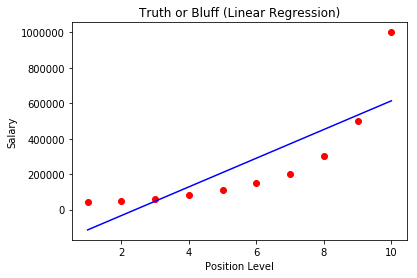

In [23]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Linear Regression)')
plt.show()

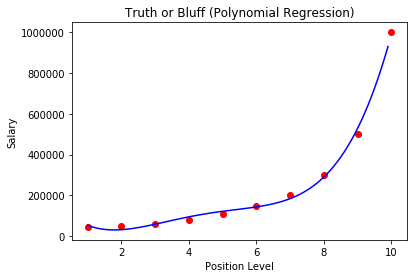

In [30]:
# Visualising the Polynomial Regression results
X_grid = np.arange(min(X), max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.show()

In [31]:
# Predict a new result with Linear Regression
lin_reg.predict(6.5)

array([330378.78787879])

In [32]:
# Predict a new result with Polynomial Regression
lin_reg_2.predict(poly_reg.fit_transform(6.5))

array([158862.45265153])

# Logistic Regression

In [5]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 9 - Logistic Regression/Section 10 - Logistic Regression/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [9]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

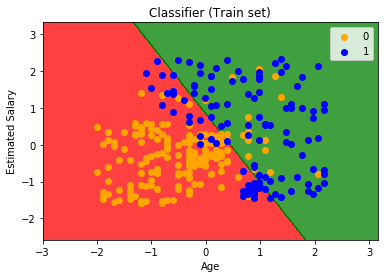

In [22]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

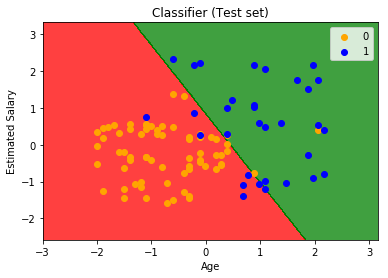

In [21]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Support Vector Machine

In [2]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [9]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

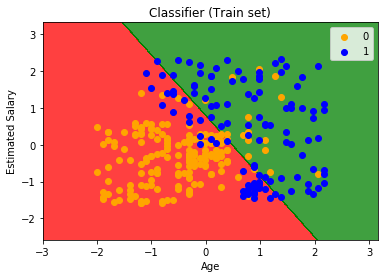

In [11]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

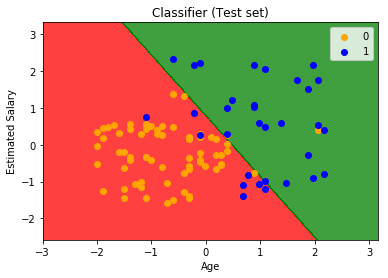

In [12]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Kernel SVM

In [2]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

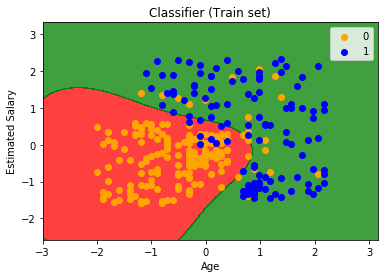

In [10]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

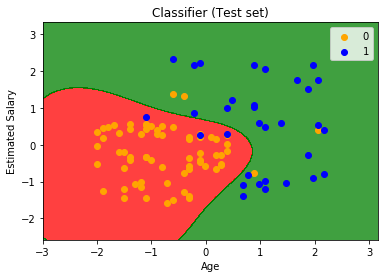

In [11]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Naive Bayes

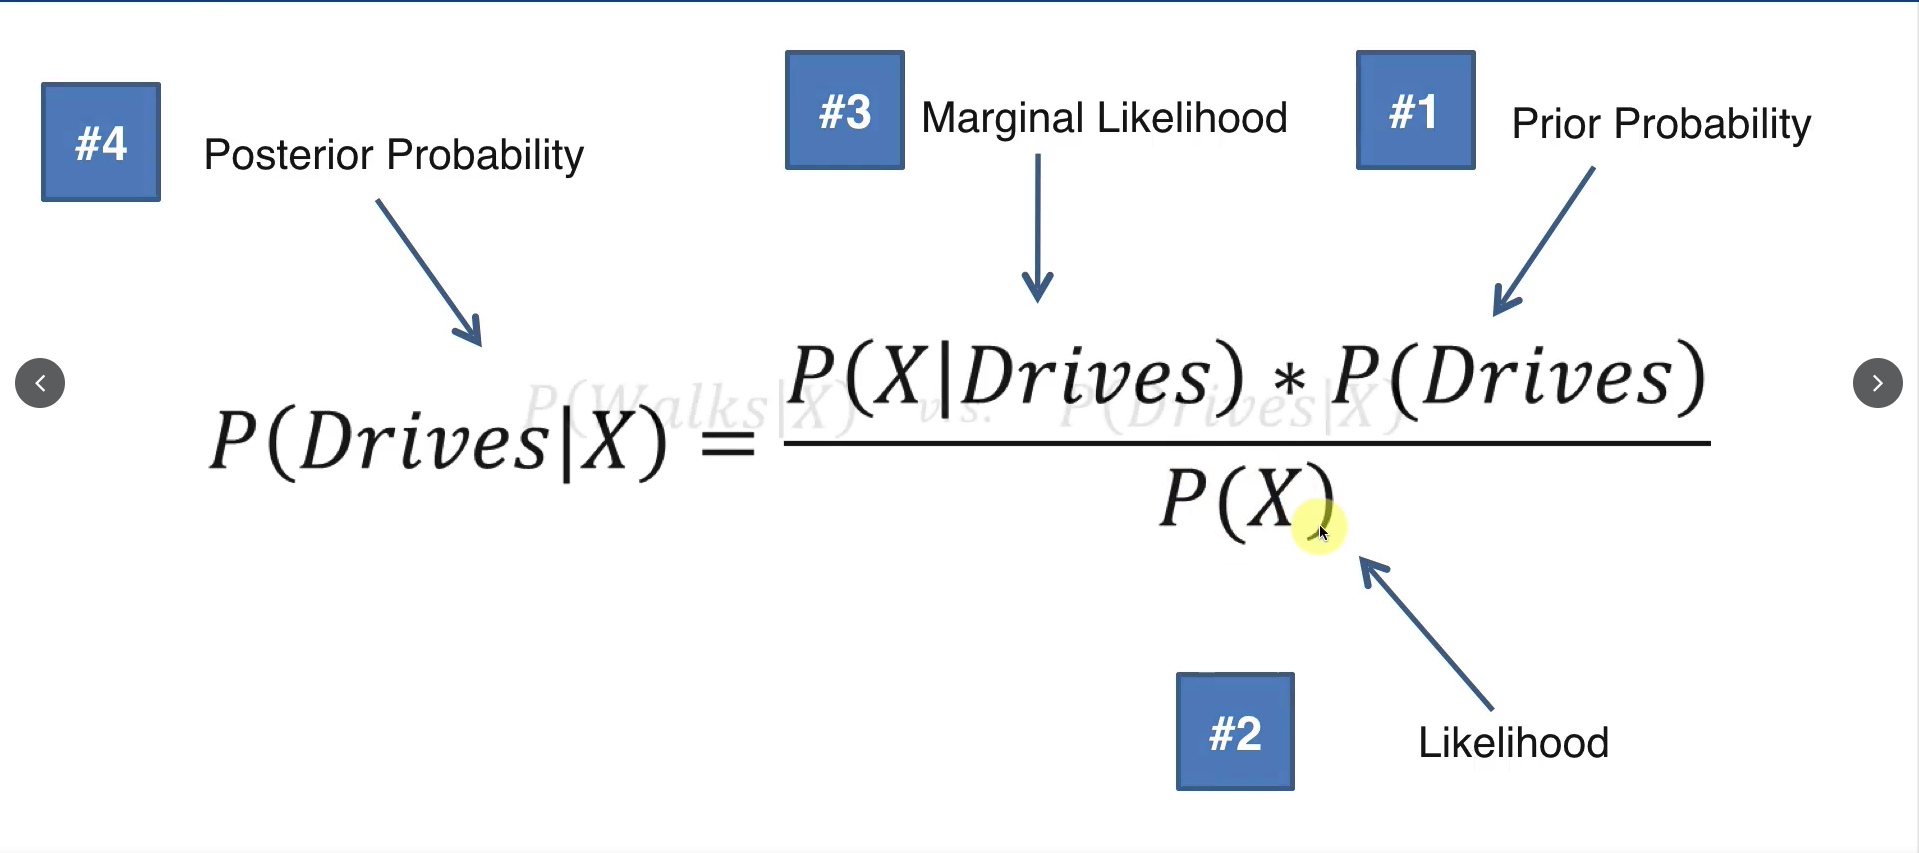

In [8]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Naive_Bayes.png")

In [9]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [10]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 7, 25]])

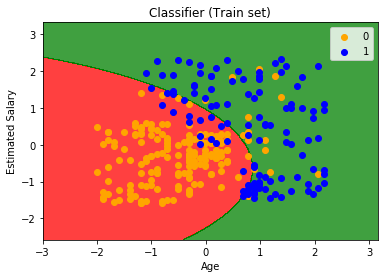

In [17]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

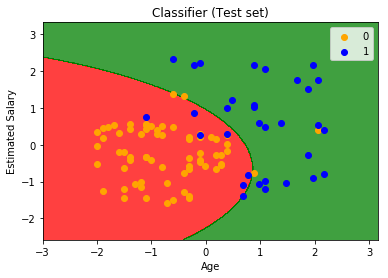

In [18]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Decision Tree

In [6]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [7]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]])

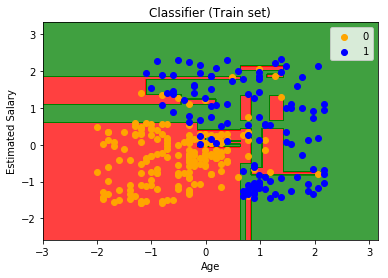

In [14]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

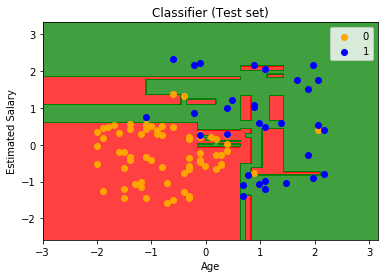

In [15]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Random Forest

In [2]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 10 - Support Vector Machine (SVM)/Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [3]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [8]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]])

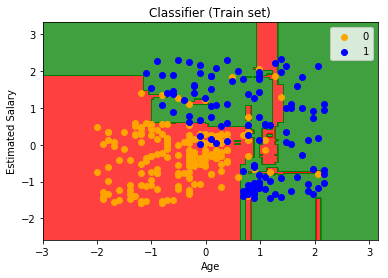

In [9]:
# Visualing the Train set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Train set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

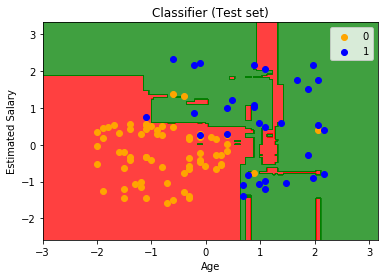

In [10]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:,1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j,1],
                c = ListedColormap(('orange', 'blue'))(i), label = j)
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

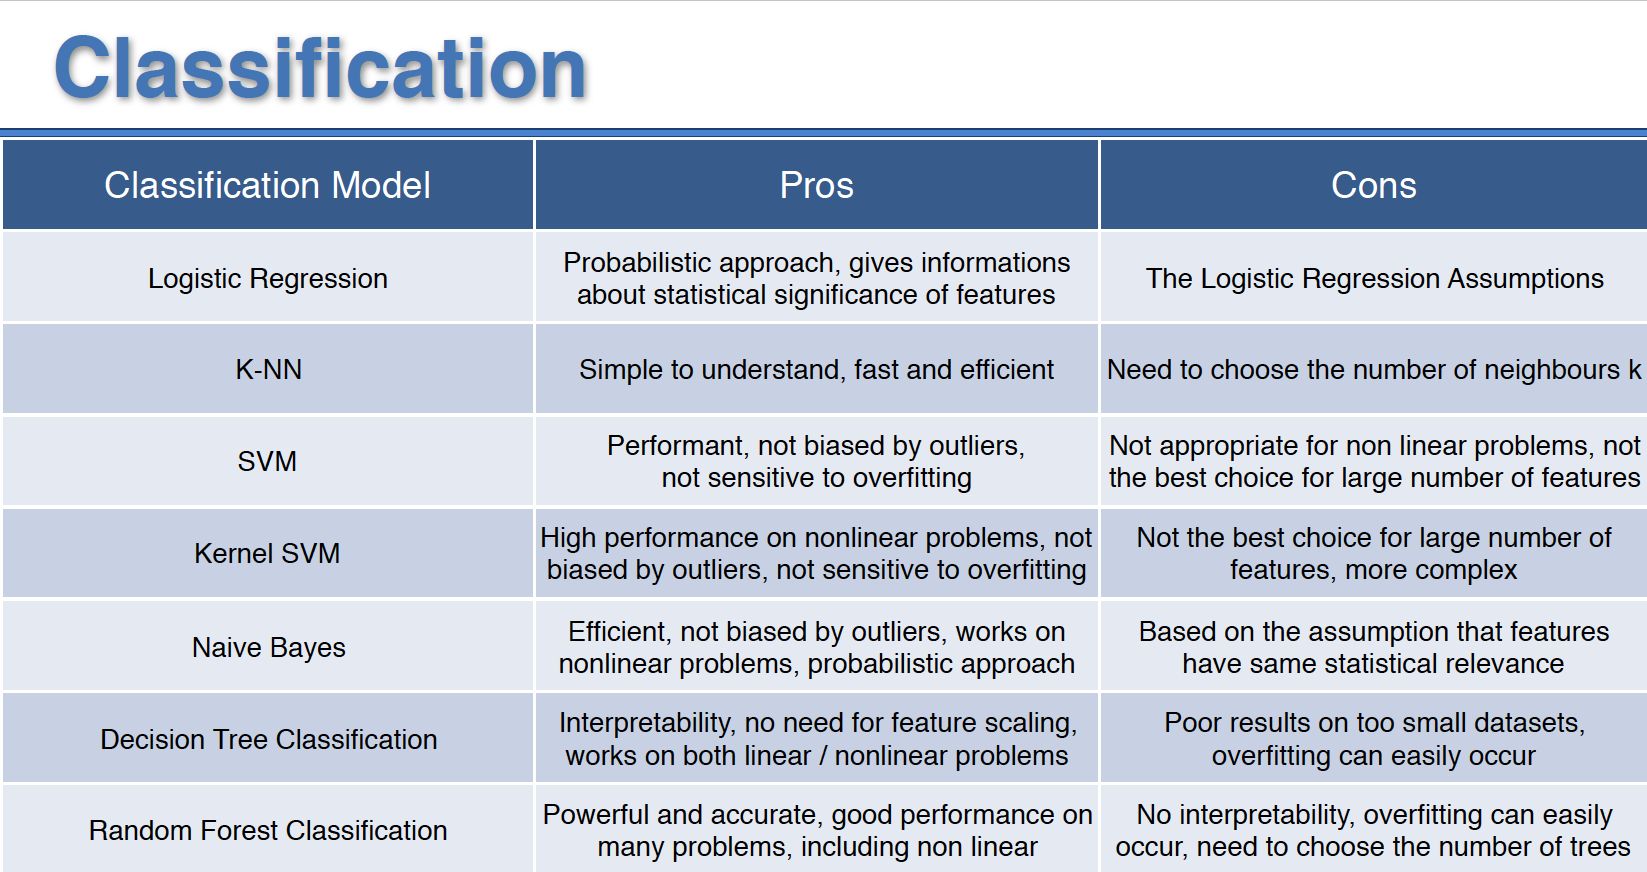

In [3]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Classification.png")

# KMeans Clustering

In [10]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 18 - K-Means Clustering/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = dataset.iloc[:,3:5].values

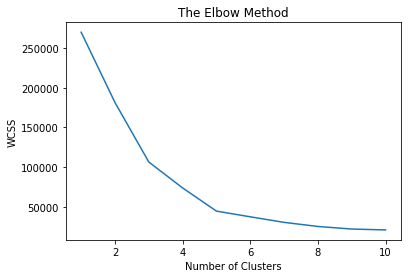

In [13]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
# Applying the k-means to the dataset
kmeans = KMeans(n_clusters = 5, max_iter = 300, n_init = 10, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)

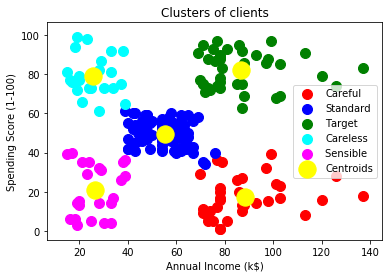

In [18]:
# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible ')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Apriori

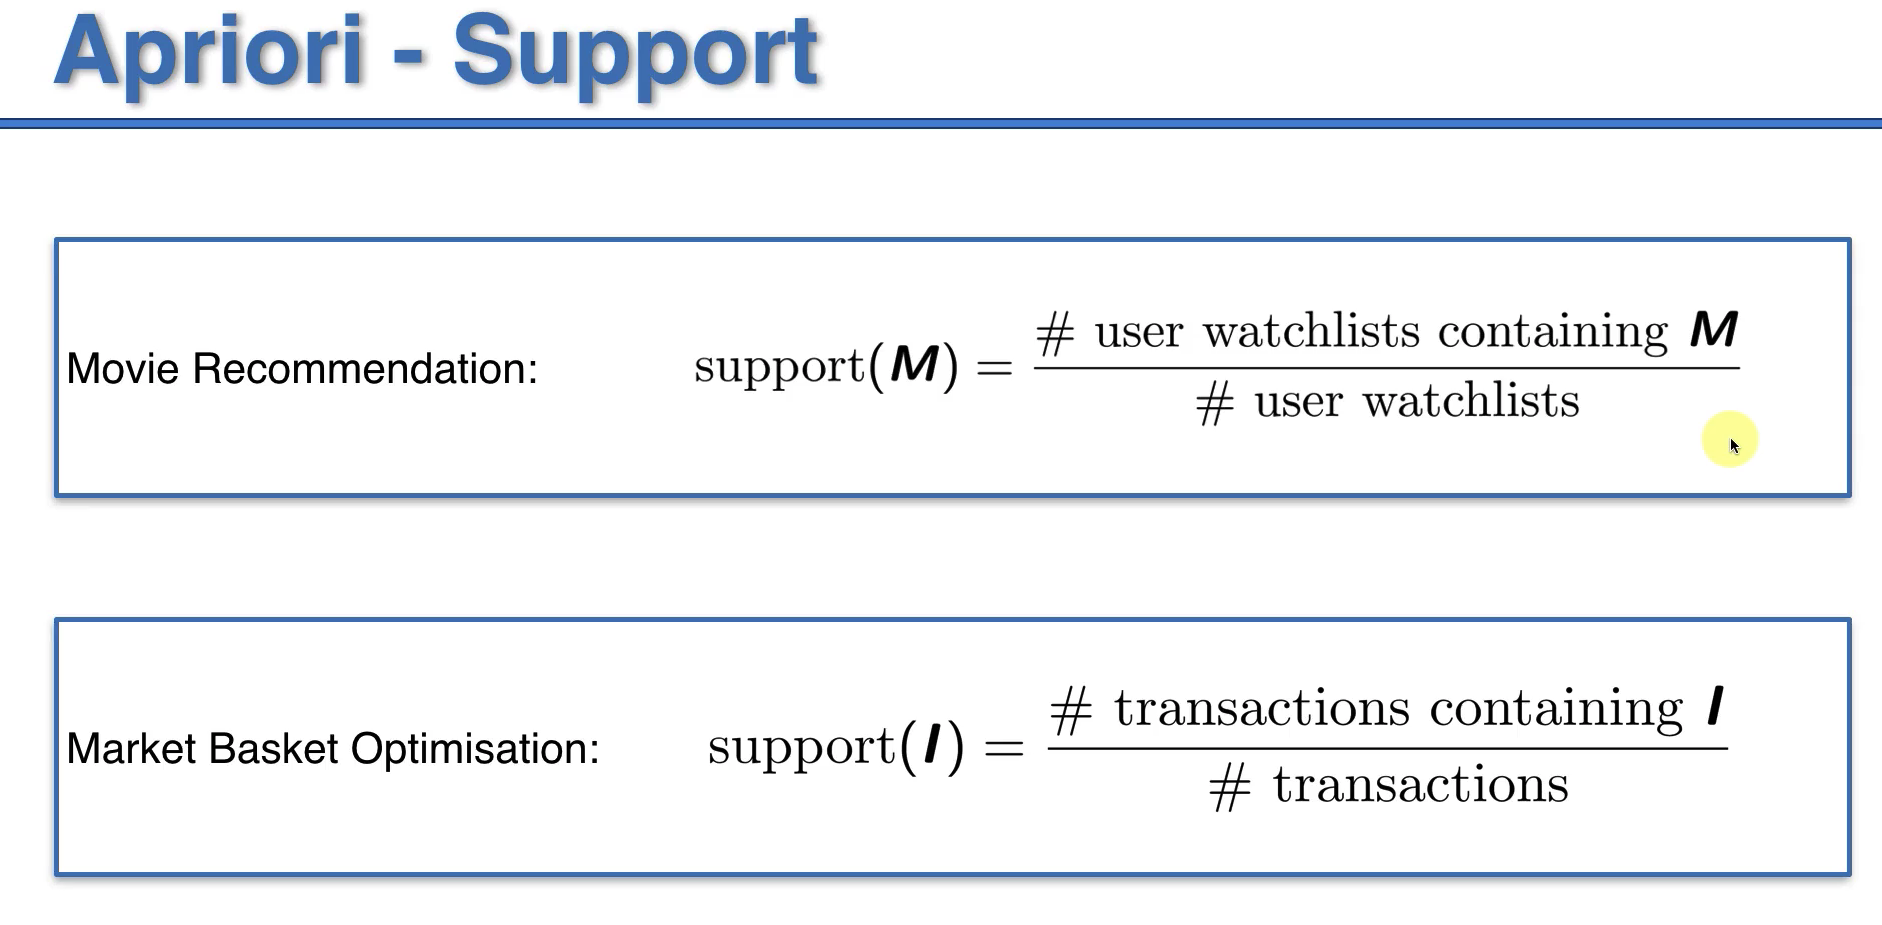

In [2]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Support.png")

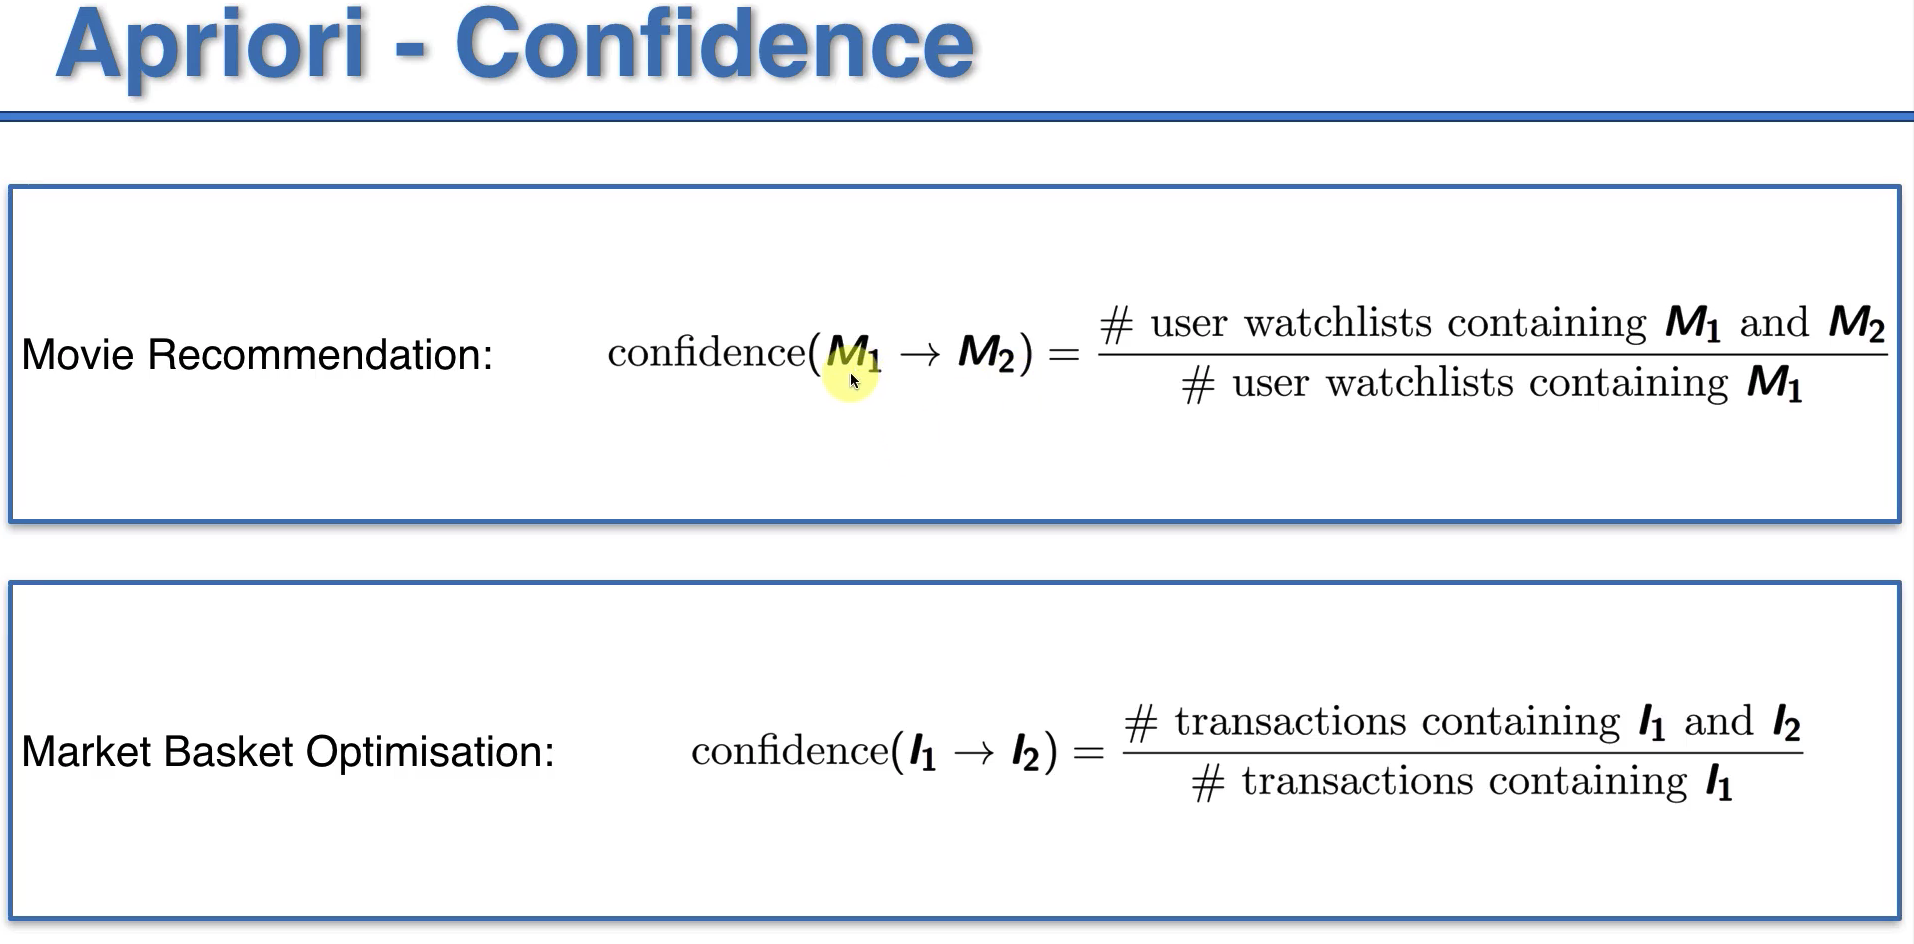

In [3]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Confidence.png")

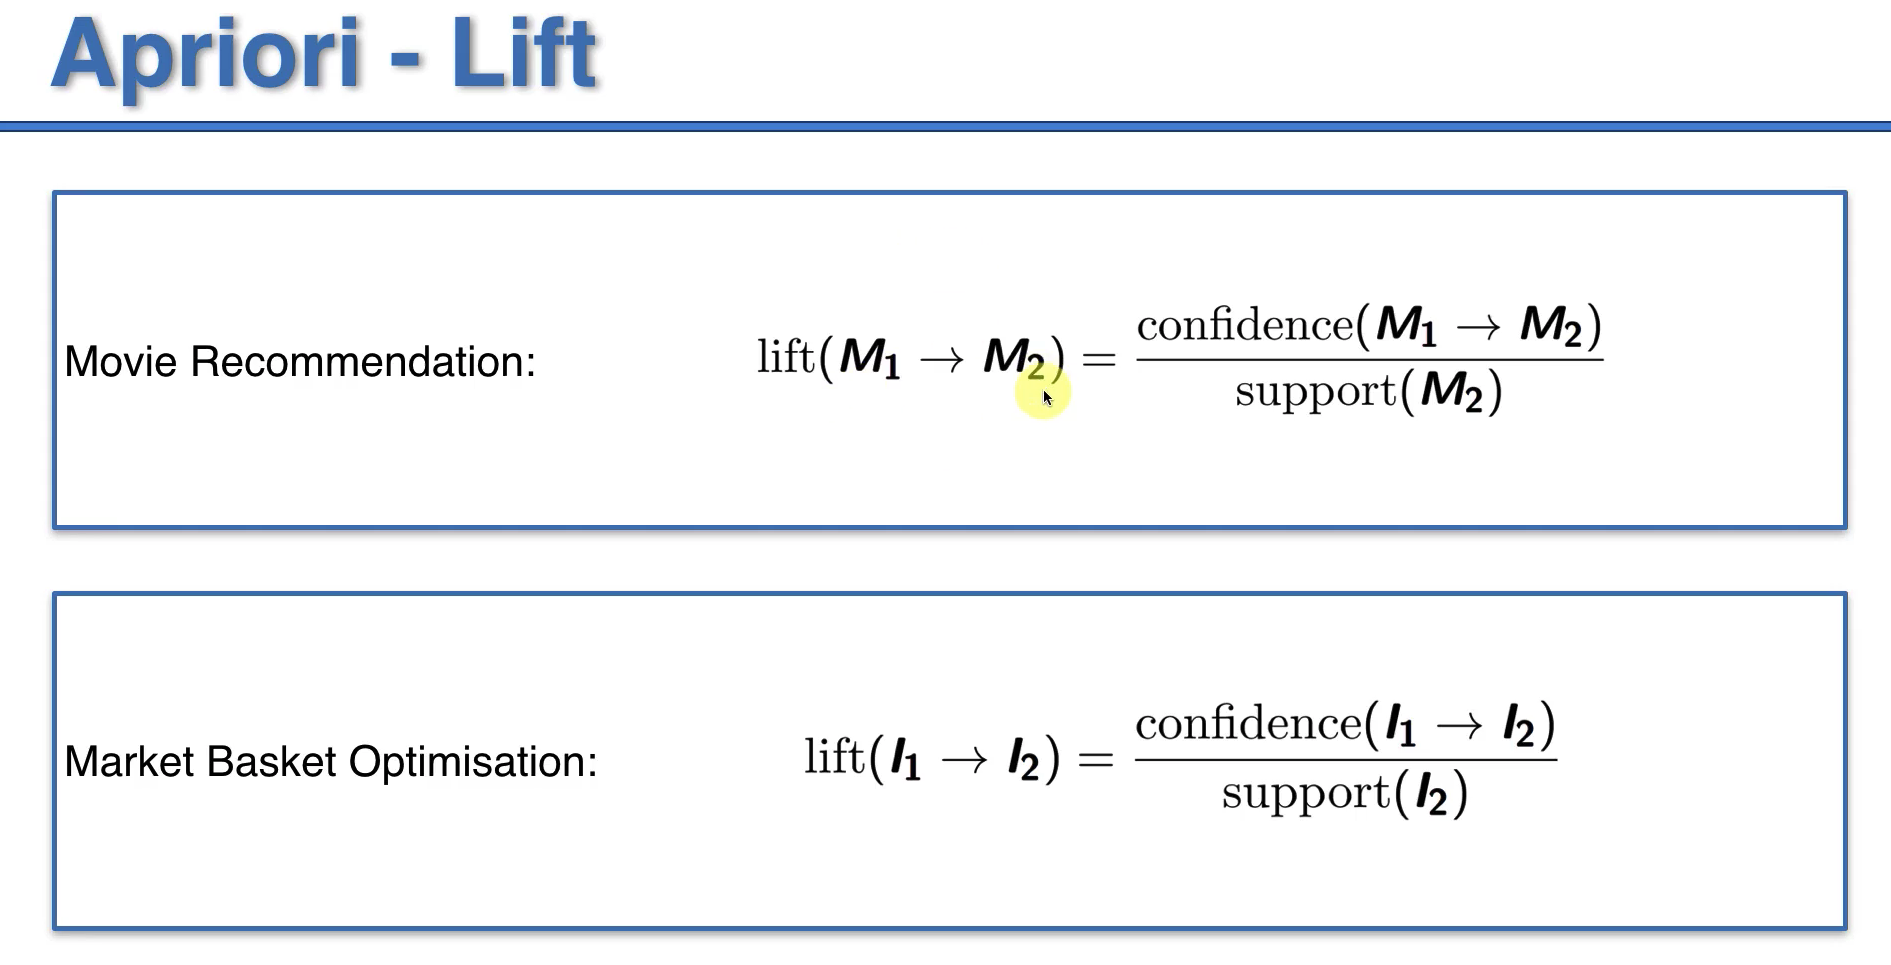

In [4]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Lift.png")

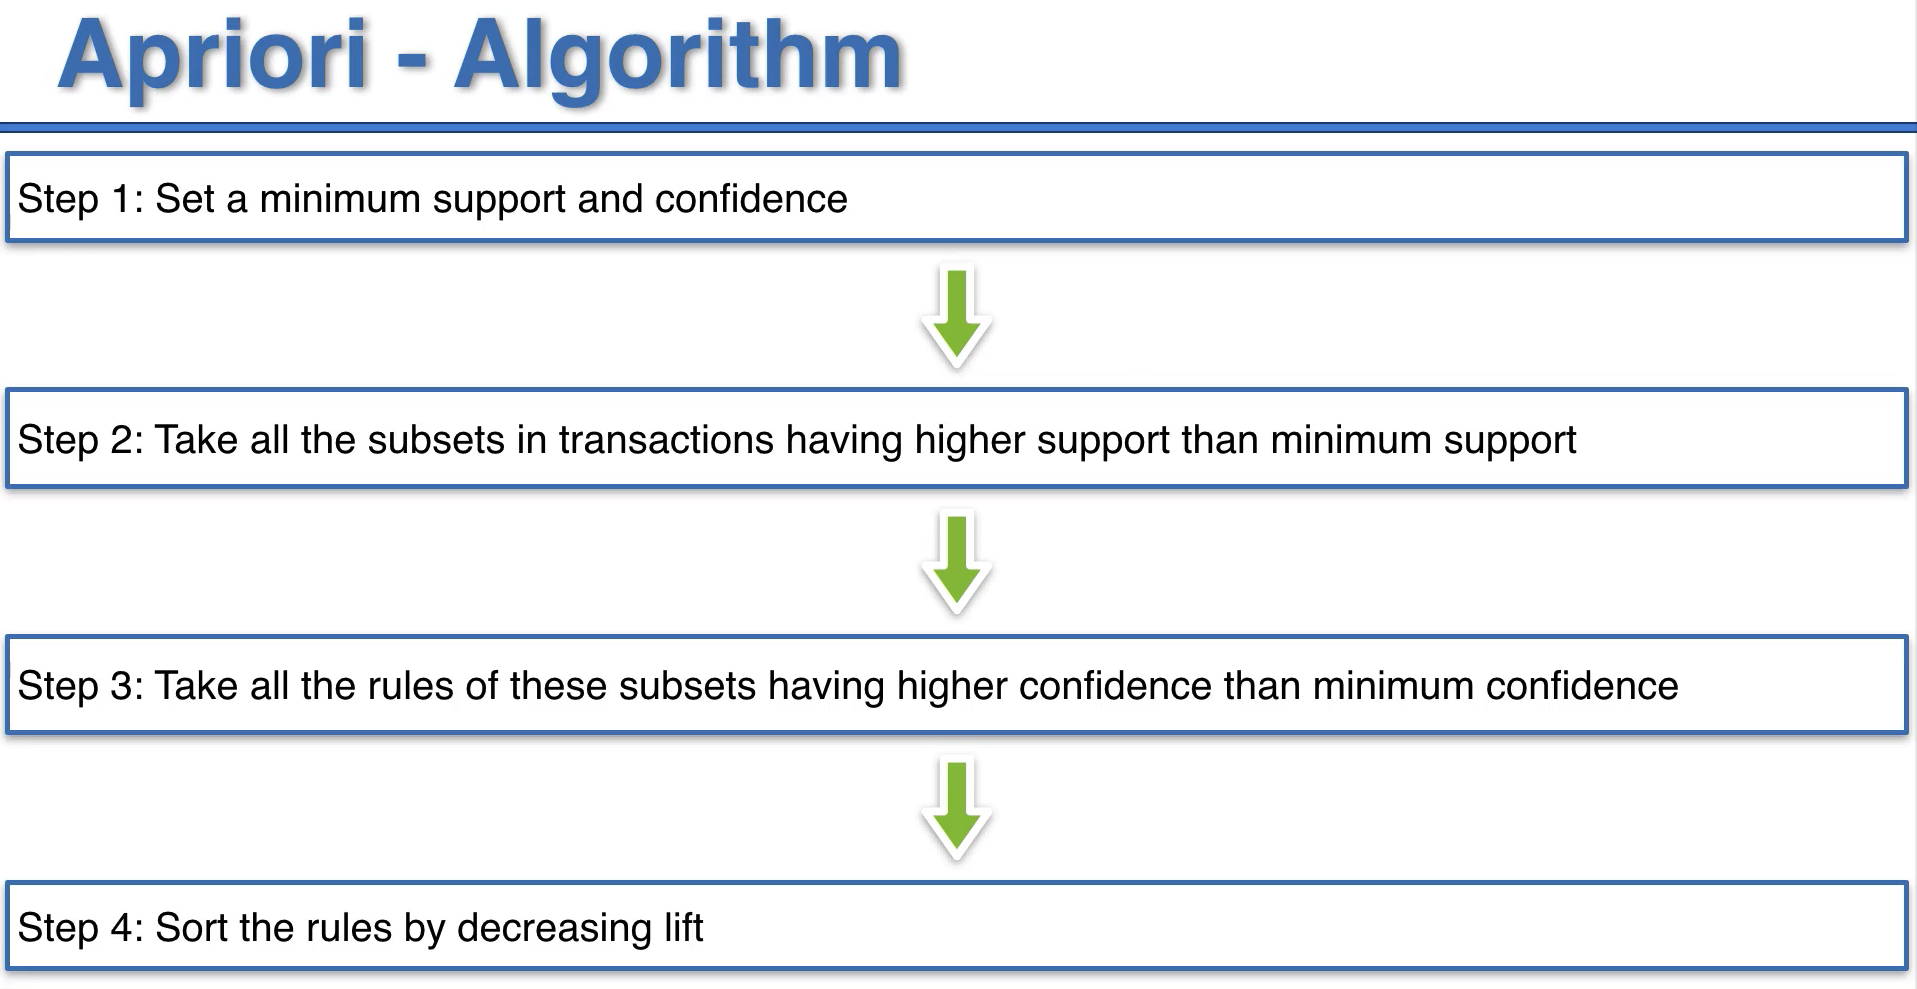

In [5]:
from IPython.display import Image
Image("/Users/Xuhuiz2/Desktop/Algorithm.png")

In [21]:
dataset = pd.read_csv('/Users/Xuhuiz2/Desktop/Machine Learning/Chapter 19 - Apriori/Apriori_Python/Market_Basket_Optimisation.csv', header = None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset.shape

(7501, 20)

In [22]:
transactions = []

In [23]:
for i in range(0,7501):
    transactions.append([str(dataset.values[i,j]) for j in range(0,20)])

In [24]:
# Training Apriori on the dataset
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [25]:
# Visualsing the results
results = list(rules)
myResults = [list(x) for x in results]